# UE IA pour la robotique: Travaux pratiques Algorithmes Evolutionnistes

* Étudiant1: Nom: Petit Prénom: Doriand
* Étudiant2: Nom: Favier Prénom: Marc


Pour faciliter le suivi, merci à chaque membre du binome de soumettre de son côté.

**Remarque :** Le render de l'environnement gym ne fonctionne pas sous jupyter (pour nous, le kernel s'arrête lorsque l'on tente un render), il faut donc exécuter directement les fichiers gym_cartpole.py pour en observer un.

## Introduction

Dans ce TME, vous allez prendre en main différents algorithmes évolutionnistes multi-objectifs et regarder comment ils se comportent. Pour cela, différentes fonctions vous sont fournies afin de tracer les individus générés à chaque génération ou de comparer les résultats entre eux. Vous testerez également Gym, un environnement utilisé en apprentissage par renforcement pour normaliser les expériences d'apprentissage sur des robots (virtuels).

Vous complèterez ce notebook et le soumettrez, avec les fichiers pythons que vous aurez écrits, sur Moodle. 

Pour ne pas surcharger le notebook, vous mettrez de préférence votre code dans un fichier python que vous chargerez avec un import. Le code que vous mettrez dans le notebook sera le code appelant vos fonctions et affichant le résultat. **Vous prendrez soin d'assurer la lisibilité de votre notebook** (limitez l'affichage au nécessaire et n'oubliez pas d'enlever les affichages que vous utiliserez peut-être pendant la phase de développement et de débogage). La lisibilité de votre notebook influera sur l'évaluation de votre travail. 

Vous aurez besoin de la bibliothèque DEAP (https://deap.readthedocs.io/en/master/) et d'OpenAI Gym (https://gym.openai.com/). Ces deux bibliothèques s'installent facilement avec la commande `pip`, comme indiqué dans leur documentation.


In [1]:
import importlib # une seule fois
import os
#!pip install deap
#!pip install gym
#!pip install scoop
#!pip install pyglet
#!pip install cma


from deap import benchmarks
import ea_simple as f
importlib.reload(f) 
import gym_cartpole as g
importlib.reload(g)
import nsga2
importlib.reload(nsga2)

import matplotlib.pyplot as plt
import numpy as np
from fixed_structure_nn_numpy import SimpleNeuralControllerNumpy

# pour que les figures apparaissent directement dans le notebook
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")


## 1. Prise en main de DEAP

Dans la suite du TME, vous serez invités à utiliser DEAP, qui est une bibliothèque python open source, cf https://deap.readthedocs.io/en/master/index.html.

DEAP est une bibliothèque de prototypage rapide d'algorithmes évolutionnistes. Elle permet de travailler à plusieurs niveaux, depuis l'implémentation complète de l'algorithme à partir de briques de base jusqu'à l'utilisation boite noire d'un algorithme entièrement implémenté et en passant par des approches intermédiaires, dans lesquelles des modules sont réutilisés, par exemple pour la sélection, les mutations ou les croisements.  


Écrivez un algorithme évolutionniste de type élitiste qui génèrera lambda individus de type vecteurs de paramètres et choisira les mu meilleurs parmi les parents et les enfants. 

Vous utiliserez un croisement de type SBX (Simulated Binary Crossover) et une mutation de type polynomiale bornée (eta=15.0).

Les paramètres seront entre -5 et 5 (vous pourrez utiliser random.uniform pour l'initialisation).

Vous utiliserez les fonctions de la toolbox DEAP pour faciliter votre implémentation et vous pourrez vous inspirer des exemples fournis. Vous compléterez le fichier `ea_simple.py`. 

Vous testerez votre algorithme sur la fonction de Ackley. Elle est disponible dans DEAP et peut être appelées dans n'importe quelle dimension. Vous pourrez faire vos tests avec la dimension 10, par exemple. 


Les algorithmes évolutionnistes ont une part stochastique et ne donnent donc pas toujours le même résultat. Vous tracerez donc l'évolution de la fitness moyenne pour 10 runs indépendants. Plutôt que de tracer les 10 courbes, vous tracerez la médiane des moyennes et un intervalle représentant le 1er et le 3eme quartile. Vous procéderez pour cela de la façon suivante:


    plt.plot(gen,moyenne, label="Fitness moyenne")
    plt.fill_between(gen, fit_25, fit_75, alpha=0.25, linewidth=0)

gen étant une liste de générations, moyenne la liste des moyennes de moyennes et fit_25 et fit_75 les 1er et 3eme quartiles pour ces générations. Vous pourrez déterminer fit_25 et fit_75 avec la fonction quantile de numpy: quantile(points, 0.25) et quantile(points, 0.75), avec points une liste qui contient les fitness des différents runs à une génération donnée (il faut donc faire une boucle et appeler ces fonctions pour chaque génération).


Tracez les courbes pour des populations de taille croissante: [5, 10, 100, 200]. Que constatez-vous ?


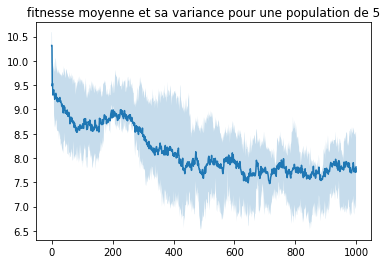

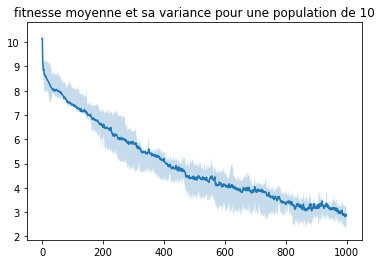

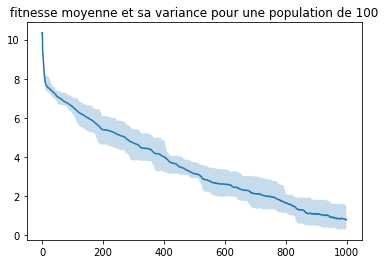

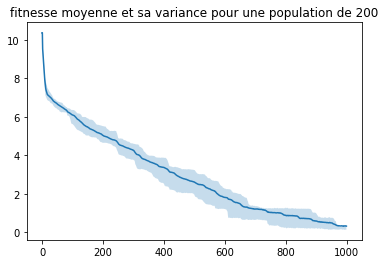

In [45]:
import ea_simple as f
importlib.reload(f)

nbgen = 1000

for n in np.array([5,10,100,200]):
    moyenne = []
    for i in range(10):
        pop, hol, logbook = f.ea_simple(n = n, nbgen = nbgen, evaluate = benchmarks.ackley, IND_SIZE = 10, weights=(-1.0,),details=False)
        moyenne.append(logbook.select("avg"))
        
        
    plt.figure()
    gen = np.arange(nbgen)
    plt.plot(gen,np.mean(moyenne,0), label="Fitness moyenne")
    plt.fill_between(gen,np.quantile(moyenne,0.25,0), np.quantile(moyenne,0.75,0), alpha=0.25, linewidth=0)
    plt.title("fitnesse moyenne et sa variance pour une population de "+str(n))



**Observations :**

Plus la taille de la population est grande, plus l'algorithme converge vers 0. Ce qui est normal puisqu'une plus grande population peut mieux explorer. La variance ne change que légèrement. Certes on a plus d'individus donc supposément une plus grande variance mais ils convergent plus vers le bon résultats et donc la population se resserre impliquant une variance plutôt constante entre les différentes tailles de populations.

Nous traçons ci-dessous l'évolution de la population sur la courbe d'Ackley pour une taille d'individu de 1 afin de mieux comprendre le fonctionnement de l'algorithme.

Plus la taille d'individu est petite plus l'algorithme converge facilement, ce qui est logique car trouver une solution dans une faible dimension est plus facile que dans une grande. Le tracé ci-dessous montre comment la population atteint progressivement le minimum de la fonction 1D, à force de cross-over et de mutations.

.........+

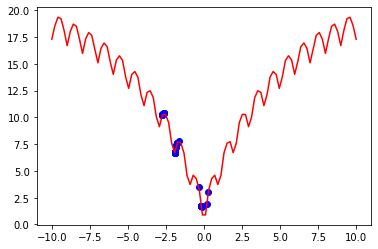

.........+

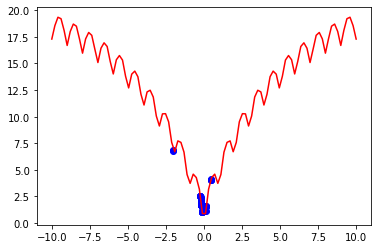

.........+

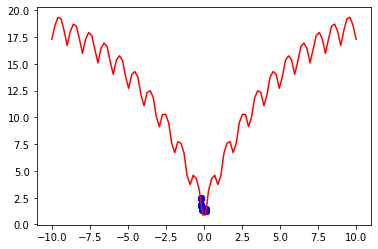

.........+

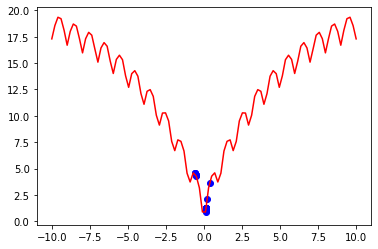

.........+

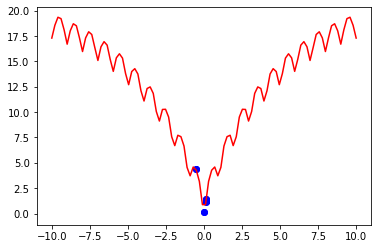

.........+

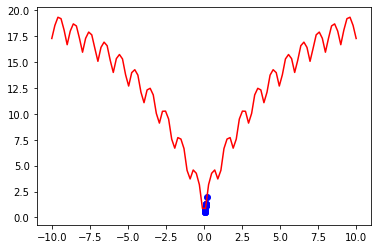

.........+

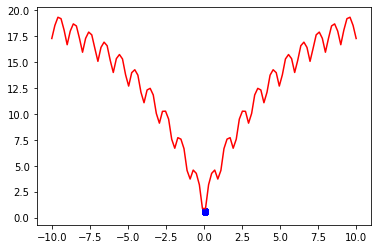

.........+

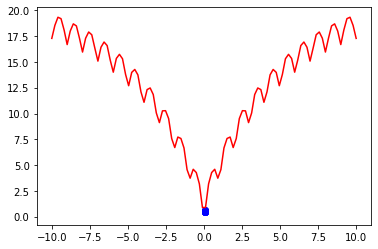

.........+

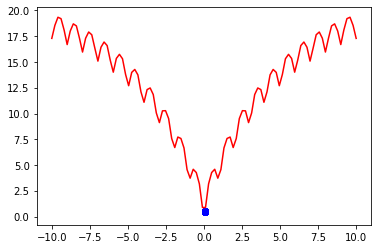

.........

In [29]:
importlib.reload(f)
pop, hol, logbook = f.ea_simple(n = 50, nbgen = 100, evaluate = benchmarks.ackley, IND_SIZE = 1, weights=(-1.0,),display=True)


## 2. Apprentissage de politiques avec gym

L'objectif de cette question est de faire un premier apprentissage de politiques. Vous utiliserez pour cela un problème très simple: le pendule inversé. Il s'agit de contrôler un pendule fixé sur un chariot et capable de tourner. Le chariot peut se déplacer horizontalement. Les mouvements horizontaux du pendule font osciller le pendule et l'objectif est de le maintenir à la verticale.

OpenAI-gym est un framework permettant d'implémenter des expériences d'apprentissage par renforcement. Il propose une interface simple et unifiée et inclut de nombreux environnements utilisés pour tester des algorithmes d'apprentissage par renforcement. Vous utiliserez cet environnement et son module CartPole-v1 pour apprendre à contrôler le pendule (voir https://gym.openai.com/envs/CartPole-v1/). 

Complétez le fichier `gym_cartpole.py`. Vous tracerez dans le notebook l'évolution des fitness comme dans la question précédente. Les calculs étant plus longs, faites en fonction de vos capacités de calcul et, le cas échéant, indiquez en commentaire ce que vous vous attendriez à observer avec une puissance de calcul supérieure. Vous pourrez ne faire le tracé que pour une taille de population.

10 de population : terminée.
20 de population : terminée.
100 de population : terminée.
200 de population : terminée.


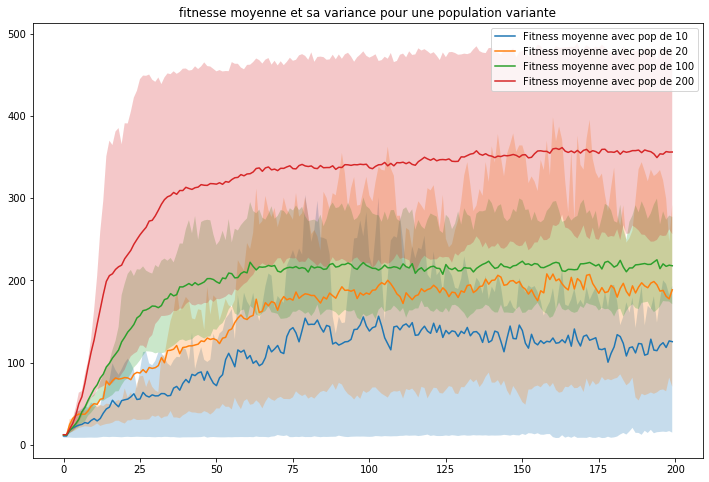

In [46]:
import gym
importlib.reload(g)
importlib.reload(f)
import fixed_structure_nn_numpy
importlib.reload(fixed_structure_nn_numpy)

nbgen = 200
nn=SimpleNeuralControllerNumpy(4,1,2,5)
IND_SIZE=len(nn.get_parameters())
plt.figure(figsize=[12,8])    
for n in np.array([10,20,100,200]):
    moyenne = []
    for i in range(10):
        env = gym.make('CartPole-v1')
        pop,hof,logbook = f.ea_simple(n=n,nbgen=nbgen,evaluate=g.eval_nn,IND_SIZE=IND_SIZE,weights=(1.0,),details=False)
        env.close()
        moyenne.append(logbook.select("avg"))
    print(str(n)+" de population : terminée.")
        
    
    gen = np.arange(nbgen)
    plt.plot(gen,np.mean(moyenne,0), label="Fitness moyenne avec pop de "+str(n))
    plt.fill_between(gen,np.quantile(moyenne,0.25,0), np.quantile(moyenne,0.75,0), alpha=0.25, linewidth=0)
    
plt.legend()
plt.title("fitnesse moyenne et sa variance pour une population variante")    
plt.show()

**Observations :**

Nous apprenons ici à stabiliser un pendule inversé, la récompense est donnée en simulant un environement gym et en cumulant la récompense à chaque step (on veut donc maximiser notre reward). Le phénotype est ici un réseau de neurones, dont les paramètres sont le génotype. Bien que le problème soit bien plus compliqué que précedemment, nous avons des résultats acceptables à partir d'une certaine taille de population et d'un certain nombre de génerations faibles (la tailles des individus, i.e. le nombre de paramètres du controleur, est de 61 bien supérieure aux individus de taille 10 de l'exercice 1). En effet, pour l'environnement Cartpole, le maximum de reward atteignable est de 500 ; on peut donc voir qu'on atteint un reward moyen qui s'approche du maximum au fur et à mesure que l'on augmente la taille de la population.

Cependant la variance est très élevée mais nous pouvions nous y attendre pour un problème complexe comme celui-ci, la fonction coût n'a probablement pas une forme aussi proche de la convexité que la fonction d'Ackley.

On peut d'ailleur remarquer, que le changement des paramètres de ea_simple (probabilité de mutation par exemple, ou taille du tournoi de sélection) peut beaucoup modifier les résultats obtenus (en bien ou en mal). Malheureusement, de par la longueur des calculs, nous n'avons pas pu tester beaucoup de combinaisons différentes pour optimiser les hyperparamètres. Peut-être aurions-nous pu même atteindre une fitness moyenne de 500 avec des meilleurs paramètres et/ou avec une plus grande population.



## 3. Implémentation de NSGA-II

Implémentez maintenant NSGA-II en vous appuyant sur les fonctions fournies dans DEAP (fichier `nsga2.py` à compléter). Vous testerez NSGA-II sur un benchmark multi-objectif fourni dans DEAP, par exemple, la fonction de Fonseca et Fleming.

Il n'est pas immédiat de caractériser les performances d'un algorithme multi-objectif avec un indicateur à une seule dimension. Vous allez utiliser l'hypervolume qui correspond au volume délimité par le front de pareto et un point de référence donné. 

Comme précédemment, tracez l'évolution de l'hypervolume (mediane et 1er et 3eme quartiles) pour des populations de taille [5, 10, 100, 200]. 

Que remarquez-vous ?

Dans le cas de la fonction de Fonseca, vous pourrez utiliser (1,1) comme point de référence.

5  de population : terminée.
10  de population : terminée.
100  de population : terminée.
200  de population : terminée.


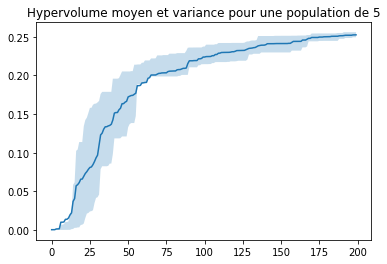

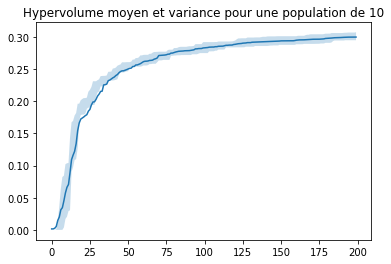

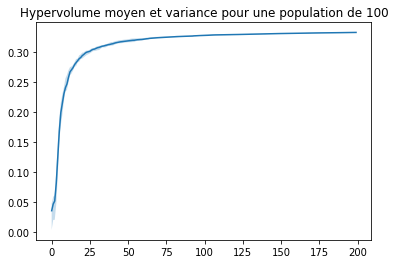

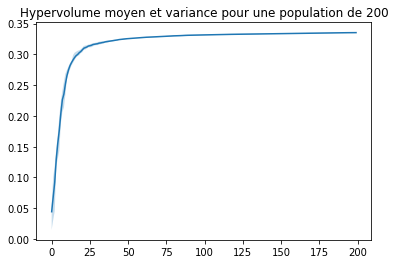

In [7]:
from deap.tools._hypervolume import hv
importlib.reload(nsga2)

nbgen = 200    
for n in np.array([5,10,100,200]):
    hypervolume = []
    for i in range (10):
        pop,paretofront,s_hv = nsga2.my_nsga2(n,nbgen,benchmarks.fonseca,IND_SIZE=10,weights=(-1.0, -1.0),ref_point=np.array([1,1]),details=False)
        hypervolume.append(s_hv)
    print(str(n)," de population : terminée.")
        
    plt.figure()
    gen = np.arange(nbgen)
    plt.plot(gen,np.mean(hypervolume,0), label="Fitness moyenne")
    plt.fill_between(gen,np.quantile(hypervolume,0.25,0), np.quantile(hypervolume,0.75,0), alpha=0.25, linewidth=0)
    plt.title("Hypervolume moyen et variance pour une population de "+str(n))



**Observations**

Nous avons tracé ci-dessus l'hypervolume obtenu au fil des générations en fonction du point (1,1) pour la fonction de fonseca-flaming. Nous expliquerons ensuite pourquoi cet hypervolume est maximisé avec nsga2 à partir du front de Pareto. Cependant, nous pouvons déjà remarquer que plus la population est grande, plus les résultats sont bons (plus haut hypervolume, et convergence plus rapide). De plus, la variance est aussi de plus en plus faible, ce qui est cohérent avec les résultats précédents.

Nous traçons ci-dessous le front de Pareto obtenu. Nous obtenons le même graph que ce que l'on peut trouver sur les articles de recherche de la fonction de fonseca-flaming (lorsque l'on trace f1(f2(x)) ). On comprend alors mieux la question de maximisation de l'hypervolume, qui correspond, en dimension 2, à une sorte d'aire entre le front de Pareto et le point de référence. Ainsi, en minimisant avec l'algorithme nsga2 la fonction de fonseca-flaming, le pareto front va se "rapprocher" de l'origine et donc l'hypervolume va croître.

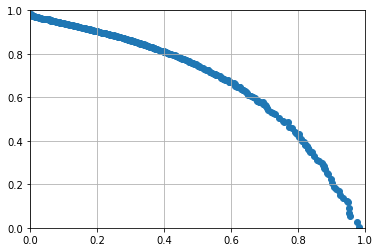

In [32]:
pop,paretofront,s_hv = nsga2.my_nsga2(200,200,benchmarks.fonseca,IND_SIZE=10,weights=(-1.0, -1.0),ref_point=np.array([1,1]),details=False)
f1 =[ind.fitness.values[0] for ind in paretofront]
f2 =[ind.fitness.values[1] for ind in paretofront]

plt.figure()
plt.scatter(f1,f2)
plt.xlim([0,1])
plt.ylim([0,1])
plt.grid()

## 4. Apprentissage direct dans l'espace des politiques, version multi-objectif

Le pendule inversé est en fait un problème multi-objectif dans lequel le pendule doit être maintenu à la verticale, le chariot étant centré dans une zone donnée. 

Compléter le fichier `gym_cartpole_2.py` pour minimiser l'erreur en x et en theta avec NSGA-2. Vous pourrez tracer l'évolution de l'hypervolume ou modifier le code de NSGA2 pour tracer l'évolution de l'erreur en x et de l'erreur en theta. 



.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........

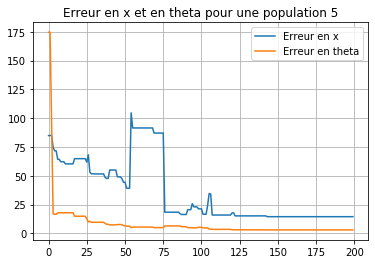

5 de population : terminée.
.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........

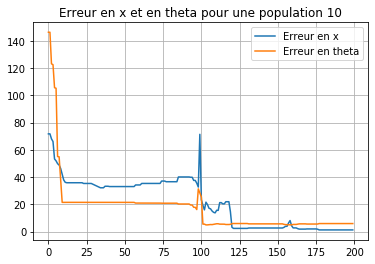

10 de population : terminée.
.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........

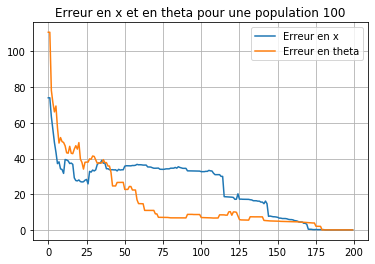

100 de population : terminée.
.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........+.........

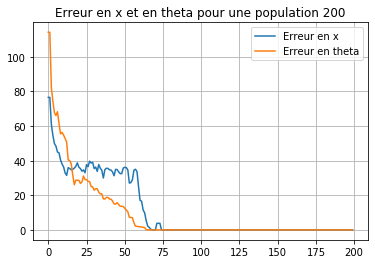

200 de population : terminée.


In [49]:
import gym_cartpole_2 as g2
importlib.reload(g)
importlib.reload(f)
importlib.reload(g2)
importlib.reload(nsga2)



nn=SimpleNeuralControllerNumpy(4,1,2,5)
IND_SIZE=len(nn.get_parameters())

nbgen = 200    
for n in np.array([5,10,100,200]):
    env = gym.make('CartPole-v1')
    pop,paretofront, s_hv,mean_x,mean_theta = nsga2.my_nsga2(n,nbgen,g2.eval_nn,gym=True,IND_SIZE=IND_SIZE,weights=(-1.0,-1.0),ref_point=np.array([1,1]))
    env.close()

    plt.figure()
    plt.plot(np.arange(len(mean_x)),mean_x,label="Erreur en x")
    plt.plot(np.arange(len(mean_theta)),mean_theta,label="Erreur en theta")
    plt.title("Erreur en x et en theta pour une population "+str(n))
    plt.legend()
    plt.grid()
    plt.show()
    print(str(n)+" de population : terminée.")


**Observations:**

Tout d'abord, nous observons comme prévu des erreurs décroissantes, qui tendent vers 0. En regardant le render d'un élément de notre paretofront (en exécutant directement les fichiers .py, cf début du notebook), on obtient souvent une simulation qui fonctionne très bien (haut reward).

Certaines oscillations très brusques pour de petites populations sont assez difficiles à expliquer (le hasard d'une mutation intempestive a peut-être un lien), mais le résultats décroît toujours vers 0. De plus, une plus grande population permet une convergence plus rapide.

Enfin, nous pouvons constater que, comme prévu, considérer cartpole comme un problème multi-objectif permet des résultats bien meilleurs, avec un pendule qui reste bien plus longtemps sans tomber.
